In [7]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [8]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [9]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [10]:
def kdj_ma_confirmation_factor(df, kdj_period=9, ma_period=50):
    """Combines KDJ overbought/oversold signals with MA trend confirmation"""
    # KDJ Calculation
    low_min = df['low'].rolling(kdj_period, min_periods=1).min()
    high_max = df['high'].rolling(kdj_period, min_periods=1).max()
    rsv = 100 * (df['close'] - low_min) / (high_max - low_min + 1e-8)
    K = rsv.ewm(span=3, adjust=False).mean()
    D = K.ewm(span=3, adjust=False).mean()
    J = 3*K - 2*D
    
    # MA Calculation
    ma = df['close'].ewm(span=ma_period, adjust=False).mean()
    
    # Combined signal
    trend_direction = np.where(df['close'] > ma, 1, -1)
    kdj_signal = (K + D + J)/3 - 50
    return kdj_signal * trend_direction

In [11]:
evaluator.set_factor(
    factor_data_or_func=kdj_ma_confirmation,
    factor_name='kdj_ma_confirmation'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): 0.006275
   Rank_IC (Spearman): 0.008013
📊 信息比率:
   IR: 0.403617
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130330
   因子列: kdj_ma_confirmation
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


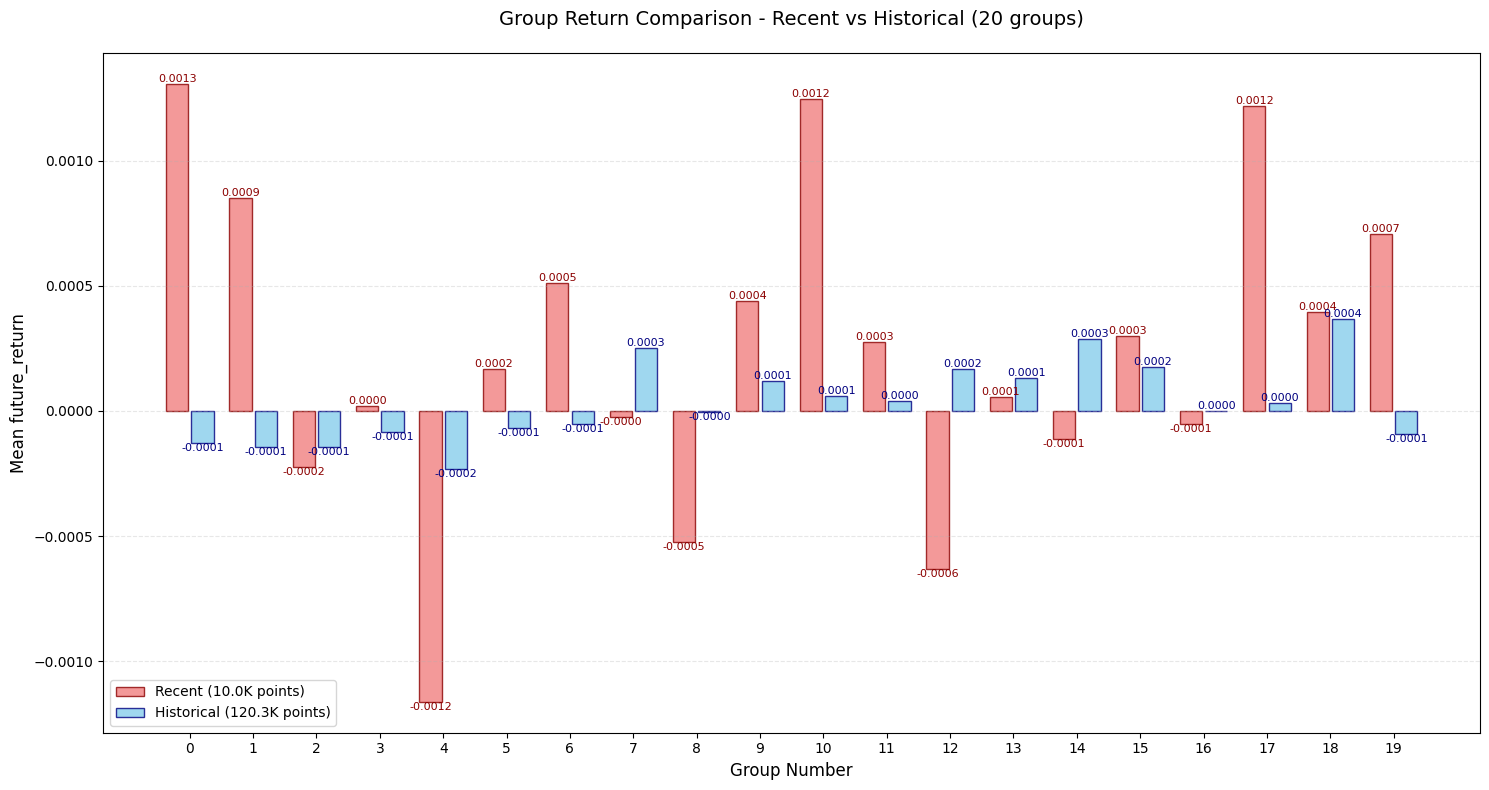

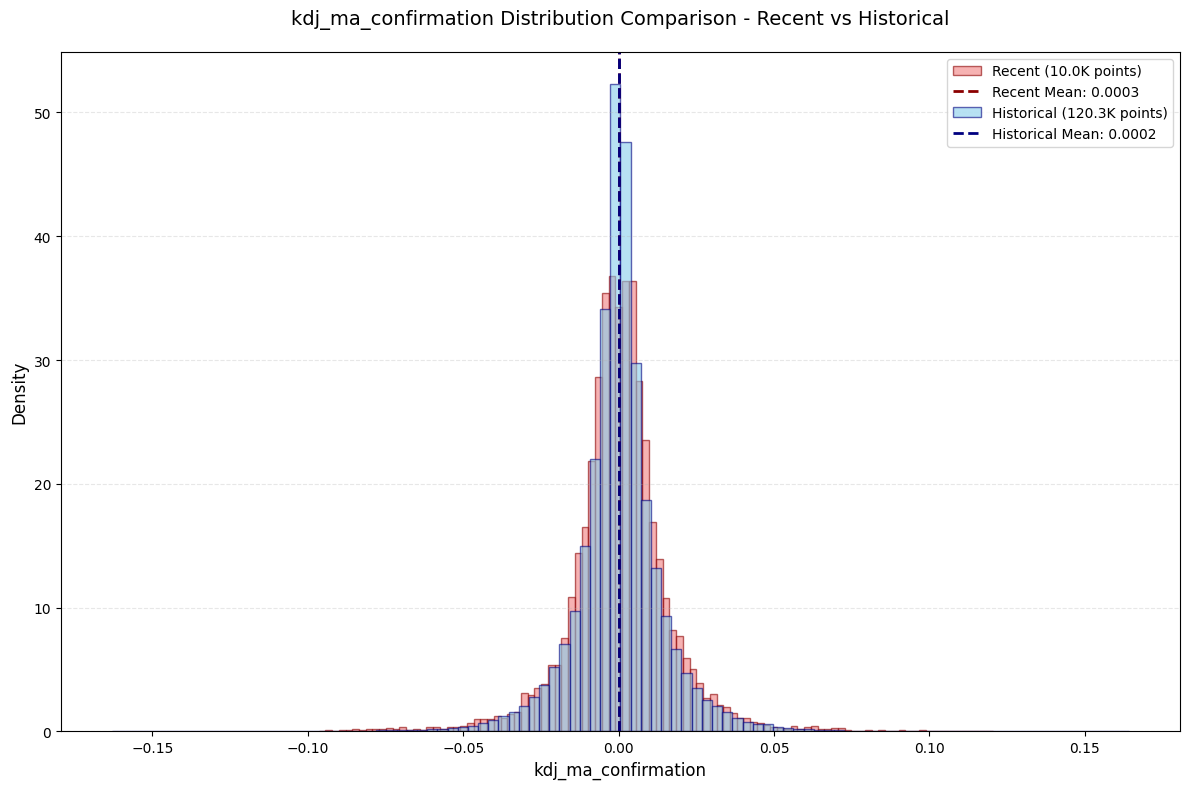

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [12]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)